# Low Resolution Images

In [94]:
import numpy as np
import skimage as sk
import skimage.io as skio

def align(new, base):
    # look at all displacements over [-15,15] for both (x,y)
    best_mse = ((base - new)**2).mean(axis=None)
    best = new
    best_y = 0
    best_x = 0
    for i in range(-15, 16):
        for j in range(-15, 16):
                displaced_new = np.roll(new, i, axis=0)
                displaced_new = np.roll(displaced_new, j, axis=1)
                new_mse = ((base - displaced_new)**2).mean(axis=None)
                if new_mse < best_mse:
                    best_mse = new_mse
                    best = displaced_new
                    best_y = i
                    best_x = j
    return best, best_y, best_x

def crop(img):
    return img[20:img.shape[0] - 20,20:img.shape[1] - 20]

            
    # displaced_new <- roll displaced pixels over in g
    # calculate mean-squared error (MSE) between b and displaced_g
    # save best displacement for g

def makeLowRes(imname):
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)

    # separate color channels
    b = im[:height]
    b_orig = b
    g = im[height: 2*height]
    g_orig = g
    r = im[2*height: 3*height]
    r_orig = r

    # crop 20 pixels from each side
    b = crop(b)
    g = crop(g)
    r = crop(r)

    # align images and get proper displacements
    ag, g_y, g_x = align(g, b)
    ar, r_y,r_x = align(r, b)

    # align originals
    ag = crop(g_orig)
    ar = crop(r_orig)
    b = crop(b_orig)
    ag = np.roll(ag, g_y, axis=0)
    ag = np.roll(ag, g_x, axis=1)
    ar = np.roll(ar, r_y, axis=0)
    ar = np.roll(ar, r_x, axis=1)

    print("r: <{ry},{rx}> | g:<{gy}, {gx}>".format(ry= r_y, rx=r_x, gy = g_y, gx = g_x))

    # create a color image
    im_out = np.dstack([ar, ag, b])
    im_out = crop(im_out)


    # save the image
    fname = './' + imname[:-4] + "_colored.jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


r: <12,3> | g:<5, 2>


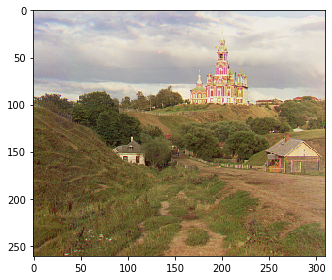

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


r: <3,2> | g:<-3, 2>


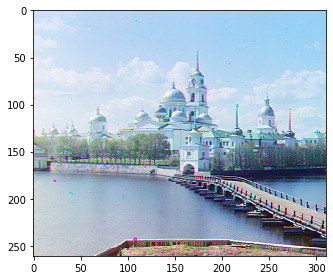

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


r: <6,3> | g:<3, 3>


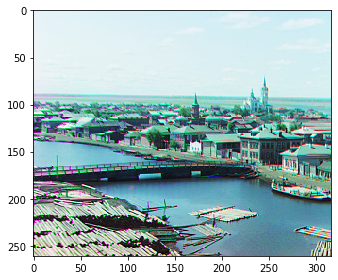

In [95]:
images = ["cathedral.jpg", "monastery.jpg", "tobolsk.jpg"]
for image in images:
    makeLowRes(image)

# High Resolution
## Aligning to Blue Channel

In [72]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale

def align(new, base, y, x):
    # look at all displacements over [-window,window] for both (x,y)
    best_mse = ((base - new)**2).mean(axis=None)
    best = new
    best_y = 0
    best_x = 0
    for i in range(y-15, y+16):
        for j in range(x-15, x+16):
                displaced_new = np.roll(new, i, axis=0)
                displaced_new = np.roll(displaced_new, j, axis=1)
                new_mse = ((base - displaced_new)**2).mean(axis=None)
                if new_mse < best_mse:
                    best_mse = new_mse
                    best = displaced_new
                    best_y = i
                    best_x = j
    return best, best_y, best_x

def big_align(new, base):
    if new.shape[0] <= 400 and new.shape[1] <= 400 and base.shape[0] <= 400 and base.shape[1] <= 400:
        return align(new, base, 0, 0)
    else:
        anew, ay, ax = big_align(rescale(new, 0.5), rescale(base, 0.5))
        ay *= 2
        ax *= 2
        return align(new, base, ay, ax)

def crop(img):
    return img[200:img.shape[0] - 200,200:img.shape[1] - 200]

def makeImage(imname):
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)

    # separate color channels
    b = im[:height]
    b_orig = b
    g = im[height: 2*height]
    g_orig = g
    r = im[2*height: 3*height]
    r_orig = r

    b = crop(b)
    g = crop(g)
    r = crop(r)

    # align images and get proper displacements
    ag, g_y, g_x = big_align(g, b)
    ar, r_y,r_x = big_align(r, b)

    # align originals
    ag = crop(g_orig)
    ar = crop(r_orig)
    b = crop(b_orig)
    ag = np.roll(ag, g_y, axis=0)
    ag = np.roll(ag, g_x, axis=1)
    ar = np.roll(ar, r_y, axis=0)
    ar = np.roll(ar, r_x, axis=1)

    print("r: <{ry},{rx}> | g:<{gy}, {gx}>".format(ry= r_y, rx=r_x, gy = g_y, gx = g_x))

    # create a color image
    im_out = np.dstack([ar, ag, b])
    im_out = crop(im_out)


    # save the image
    fname = './' + imname[:-4] + "_colored.jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

r: <58,-4> | g:<25, 4>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


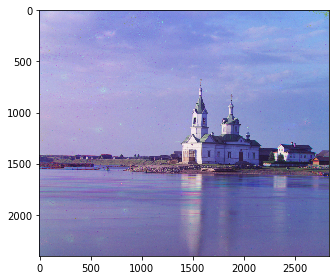

r: <93,-309> | g:<49, 24>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


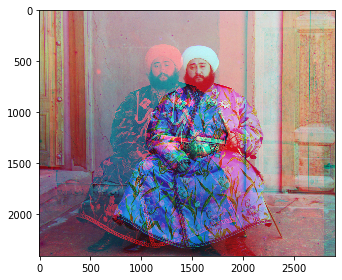

r: <124,13> | g:<59, 16>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


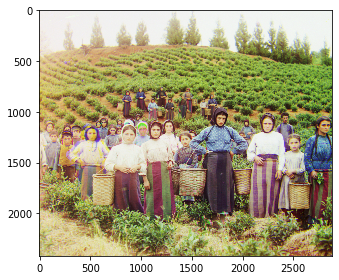

r: <89,23> | g:<40, 17>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


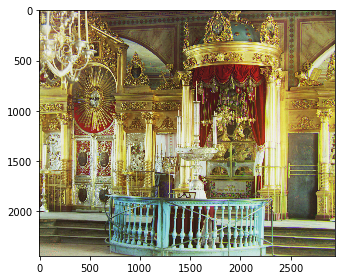

r: <113,11> | g:<47, 8>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


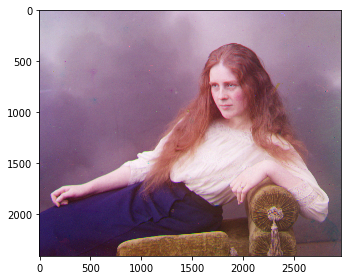

r: <178,12> | g:<82, 9>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


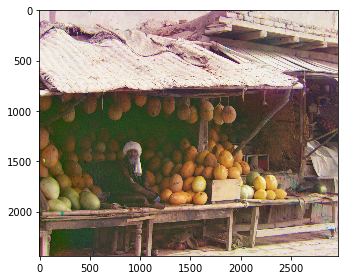

r: <108,36> | g:<51, 26>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


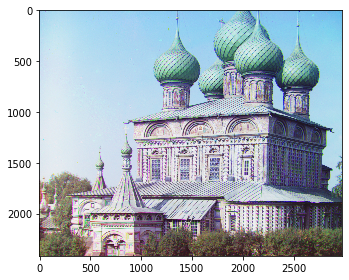

r: <176,36> | g:<78, 28>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


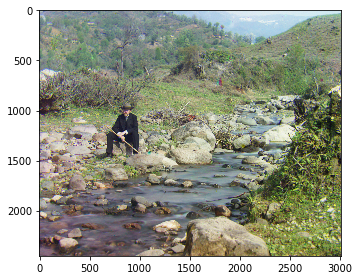

r: <111,10> | g:<53, 14>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


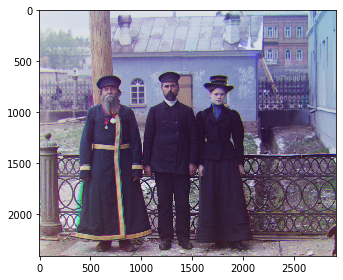

r: <87,31> | g:<42, 5>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


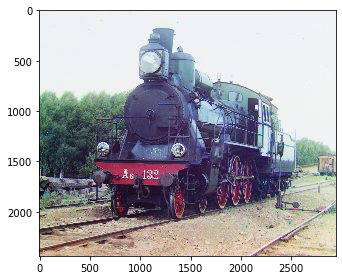

r: <104,-12> | g:<52, 0>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


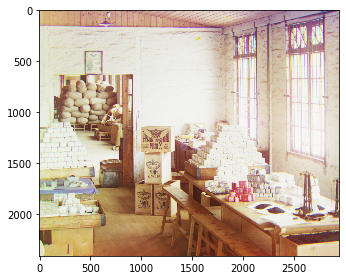

In [73]:
images = ["church.tif", "emir.tif", "harvesters.tif", "icon.tif", "lady.tif", "melons.tif", "onion_church.tif", "self_portrait.tif", "three_generations.tif", "train.tif", "workshop.tif"]
for image in images:
    makeImage(image)

## Aligning to Green Channel

In [96]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale

def align(new, base, y, x):
    # look at all displacements over [-window,window] for both (x,y)
    best_mse = ((base - new)**2).mean(axis=None)
    best = new
    best_y = 0
    best_x = 0
    for i in range(y-15, y+16):
        for j in range(x-15, x+16):
                displaced_new = np.roll(new, i, axis=0)
                displaced_new = np.roll(displaced_new, j, axis=1)
                new_mse = ((base - displaced_new)**2).mean(axis=None)
                if new_mse < best_mse:
                    best_mse = new_mse
                    best = displaced_new
                    best_y = i
                    best_x = j
    return best, best_y, best_x

def big_align(new, base):
    if new.shape[0] <= 400 and new.shape[1] <= 400 and base.shape[0] <= 400 and base.shape[1] <= 400:
        return align(new, base, 0, 0)
    else:
        anew, ay, ax = big_align(rescale(new, 0.2), rescale(base, 0.2))
        ay = np.floor(ay*5).astype(np.int)
        ax = np.floor(ax*5).astype(np.int)
        return align(new, base, ay, ax)

def crop(img):
    return img[200:img.shape[0] - 200,200:img.shape[1] - 200]

def makeImage(imname):
    # read in the image
    im = skio.imread(imname)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)

    # separate color channels
    b = im[:height]
    b_orig = b
    g = im[height: 2*height]
    g_orig = g
    r = im[2*height: 3*height]
    r_orig = r

    b = crop(b)
    g = crop(g)
    r = crop(r)

    # align images and get proper displacements
    ab, b_y, b_x = big_align(b, g)
    ar, r_y,r_x = big_align(r, g)

    # align originals
    ab = crop(b_orig)
    ar = crop(r_orig)
    g = crop(g_orig)
    ab = np.roll(ab, b_y, axis=0)
    ab = np.roll(ab, b_x, axis=1)
    ar = np.roll(ar, r_y, axis=0)
    ar = np.roll(ar, r_x, axis=1)

    print("r: <{ry},{rx}> | b:<{by}, {bx}>".format(ry= r_y, rx=r_x, by = b_y, bx = b_x))

    # create a color image
    im_out = np.dstack([ar, g, ab])
    im_out = crop(im_out)


    # save the image
    fname = './' + imname[:-4] + "_colored.jpg"
    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()

r: <33,-8> | b:<-25, -4>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


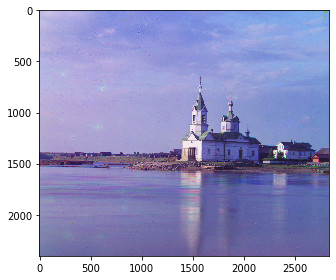

r: <57,17> | b:<-49, -24>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


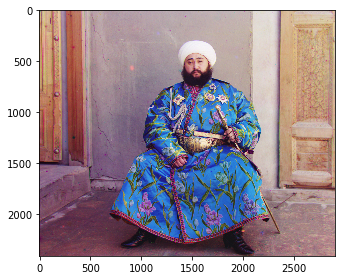

r: <65,-3> | b:<-59, -16>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


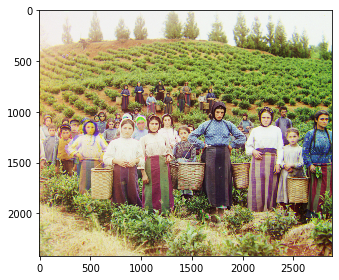

r: <48,5> | b:<-40, -17>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


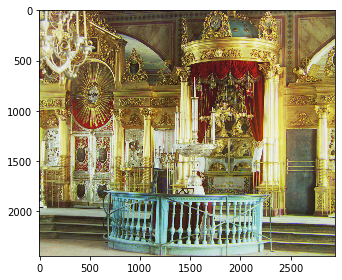

r: <62,4> | b:<-47, -8>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


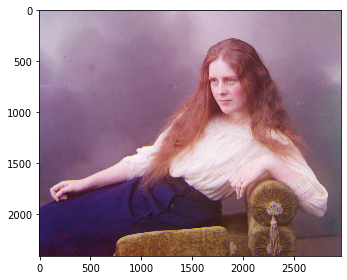

r: <96,3> | b:<-82, -9>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


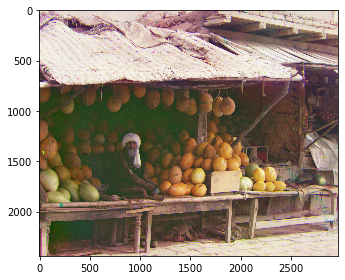

r: <57,10> | b:<-51, -26>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


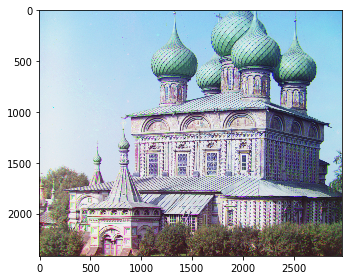

r: <98,8> | b:<-78, -28>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


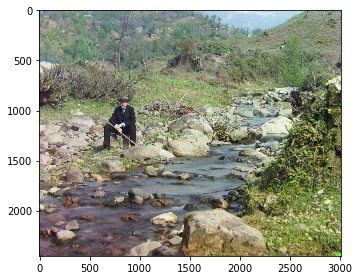

r: <58,-1> | b:<-53, -14>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


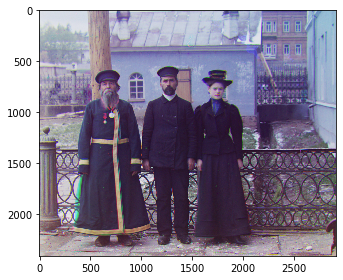

r: <43,27> | b:<-42, -5>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


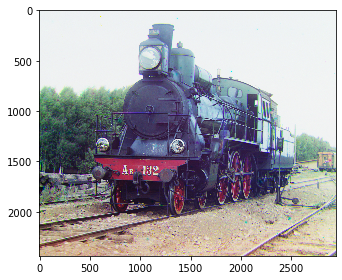

r: <52,-11> | b:<-52, 0>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


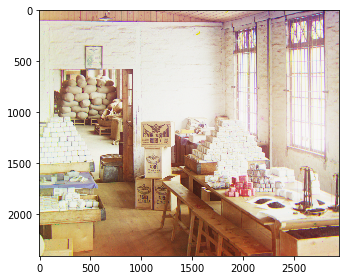

In [97]:
images = ["church.tif", "emir.tif", "harvesters.tif", "icon.tif", "lady.tif", "melons.tif", "onion_church.tif", "self_portrait.tif", "three_generations.tif", "train.tif", "workshop.tif"]
for image in images:
    makeImage(image)

# Additional Images

r: <29,6> | b:<-22, -15>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


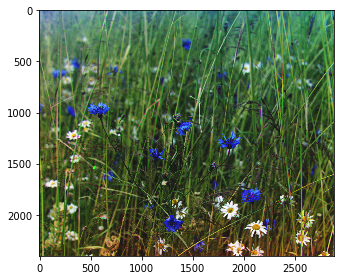

r: <81,-7> | b:<-30, 7>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


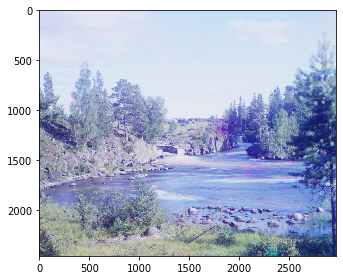

r: <52,-6> | b:<-36, -2>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


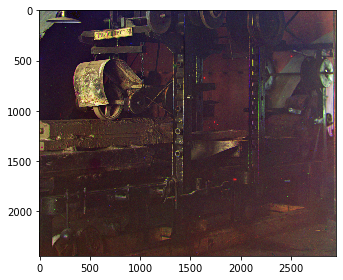

In [86]:
# Additional Images From Collection
images = ["cornflowers.tif", "waterfall.tif", "planing_machine.tif"]
for image in images:
    makeImage(image)